In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cluster import KMeans
import scikitplot as skplt

C:\Users\nesma\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
obesity_data = pd.read_csv("ObesityDataSet.csv")

In [3]:
obesity_data.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [4]:
obesity_data.shape

(2111, 17)

In [5]:
obesity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
def count_values(dataset, cat_variable, order = None):
    ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()),ha = "center", va = "top", color = "white", size = 10)
    plt.title(f"Number of items in each {cat_variable} category")
    plt.show()

In [7]:
#visualizing for categorical variables

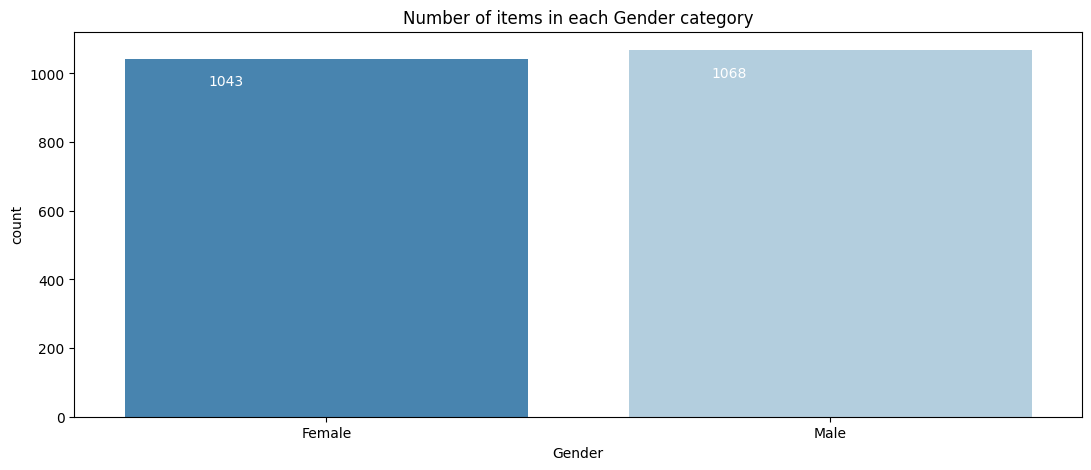

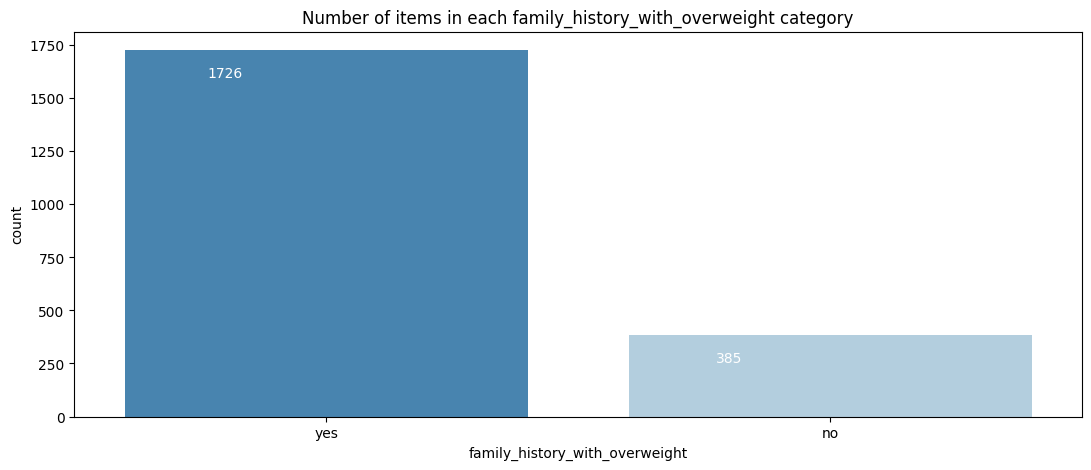

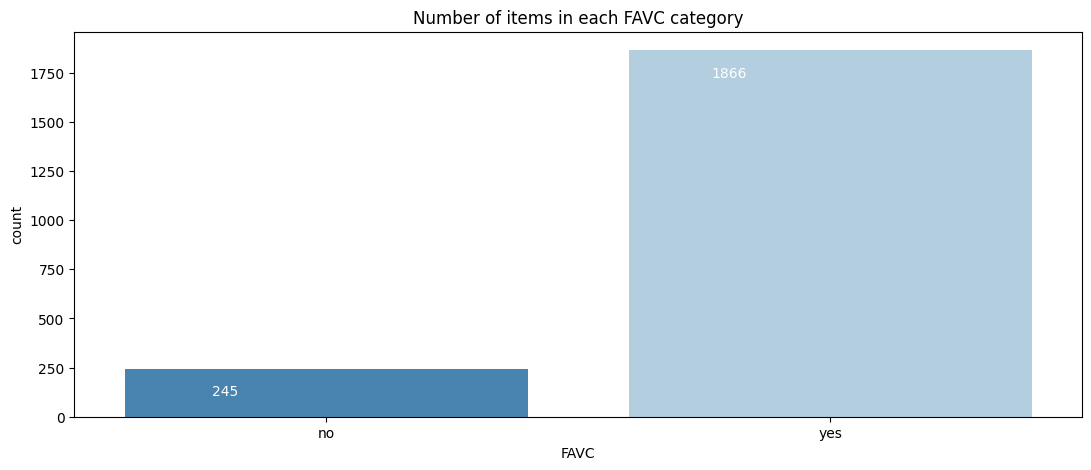

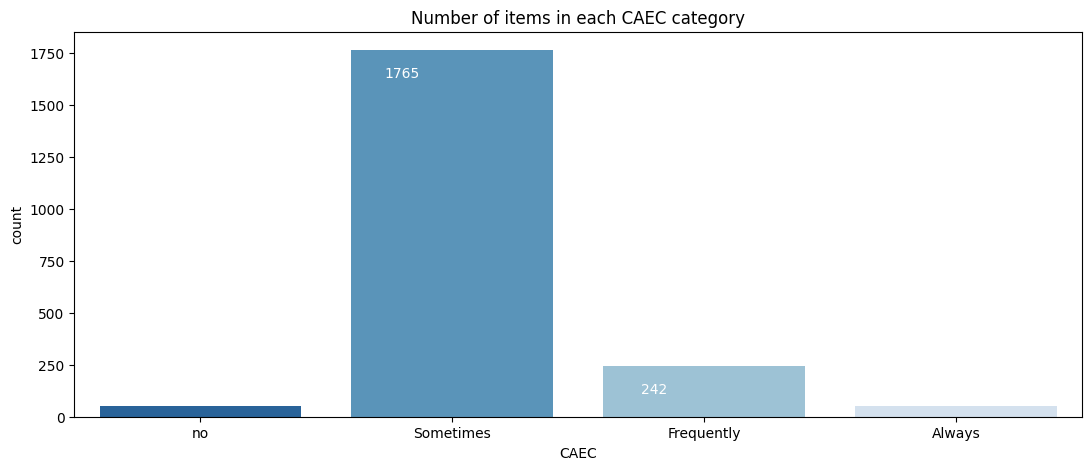

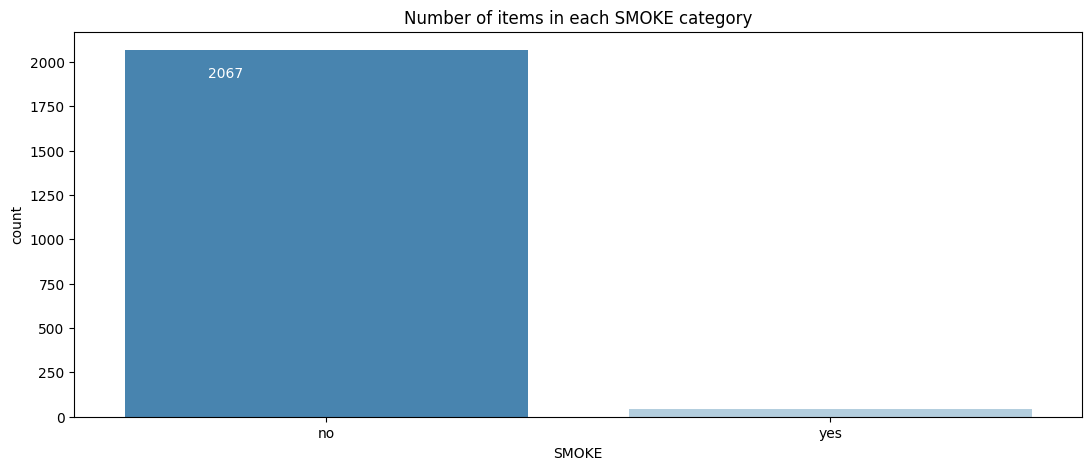

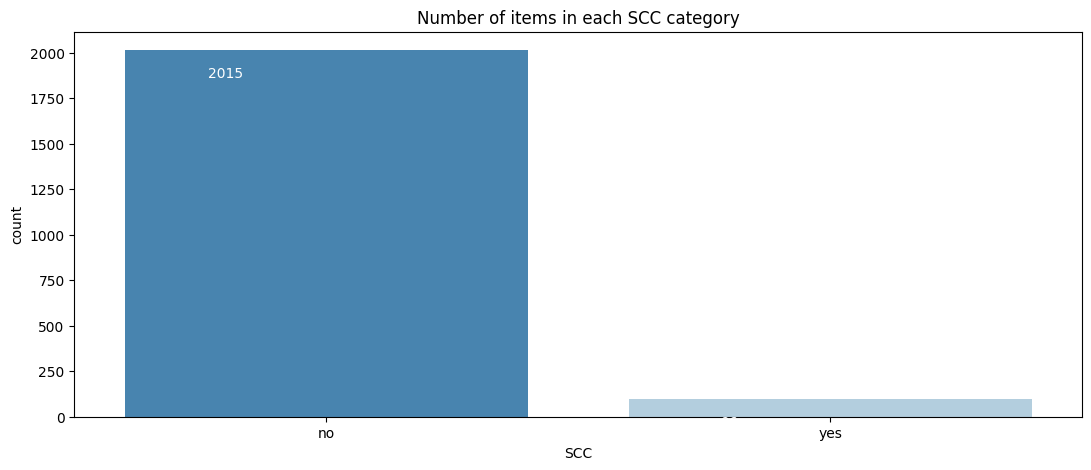

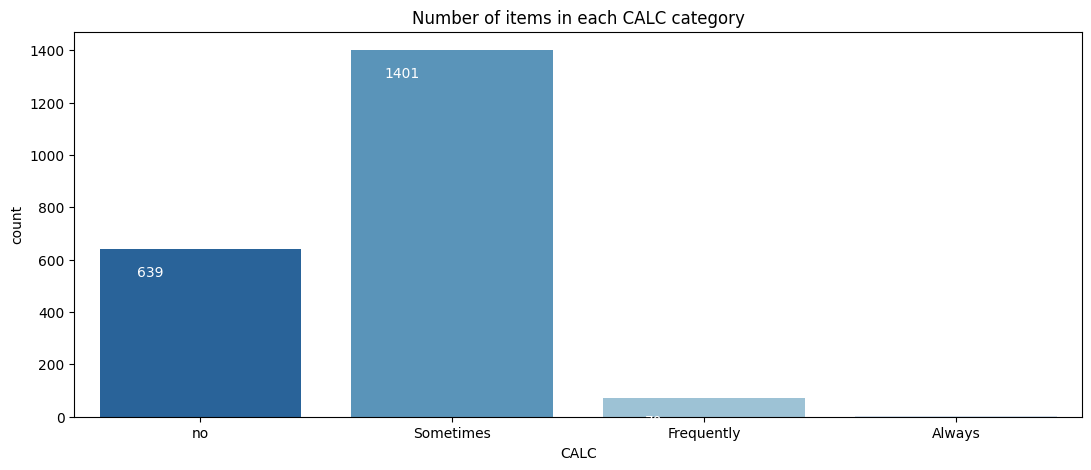

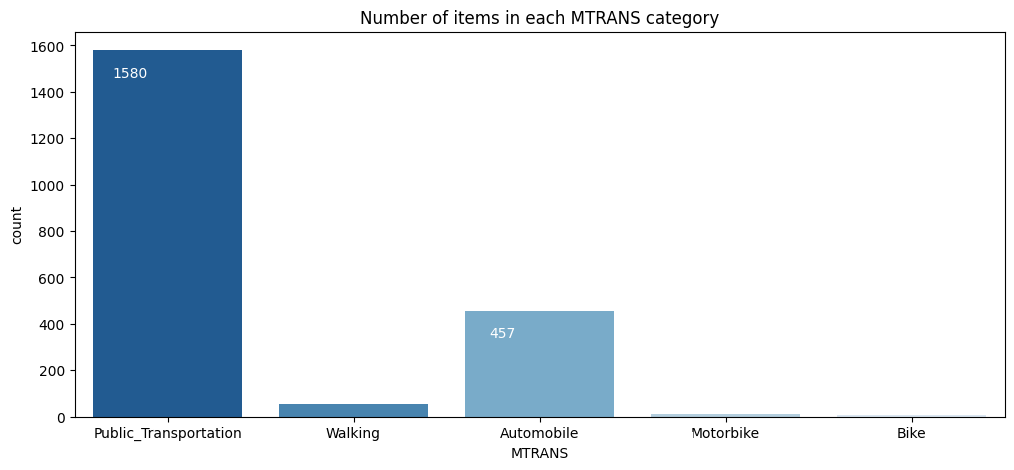

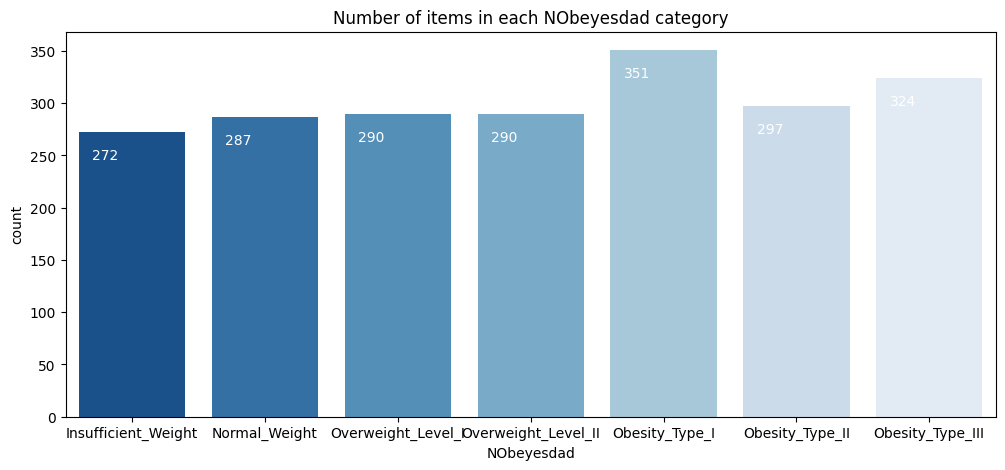

In [8]:
plt.figure(figsize = (13, 5))
count_values(obesity_data, "Gender")
plt.figure(figsize = (13, 5))
#if family members suffered from overweight.
count_values(obesity_data, "family_history_with_overweight")
plt.figure(figsize = (13, 5))
#if they eat high caloric food frequenty
count_values(obesity_data, "FAVC")

plt.figure(figsize = (13, 5))
#if and how offen they eat between meals
count_values(obesity_data, "CAEC", ["no", "Sometimes", "Frequently", "Always"])

plt.figure(figsize = (13, 5))
#if smoke
count_values(obesity_data, "SMOKE")

plt.figure(figsize = (13, 5))
#if they not Monitor intake of calories
count_values(obesity_data, "SCC")

plt.figure(figsize = (13, 5))
#if drink alcohol 
count_values(obesity_data, "CALC")

#what transportation they use
plt.figure(figsize = (12, 5))
count_values(obesity_data, "MTRANS")

plt.figure(figsize = (12, 5))
count_values(obesity_data, "NObeyesdad", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

In [9]:
def cross_plot(dataset, lead_category, sup_category, order = None):
    sns.countplot(x = lead_category, hue = sup_category, data = dataset, order = order, palette = "Blues_r")
    plt.show()

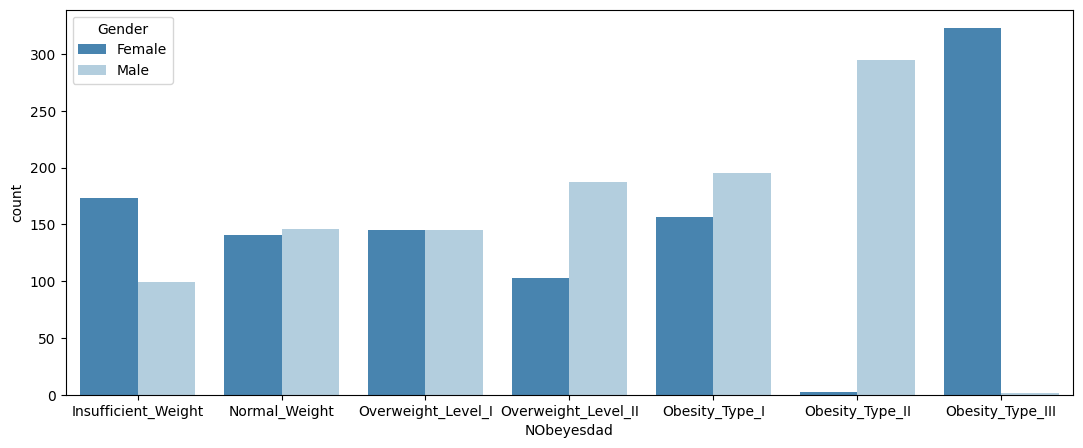

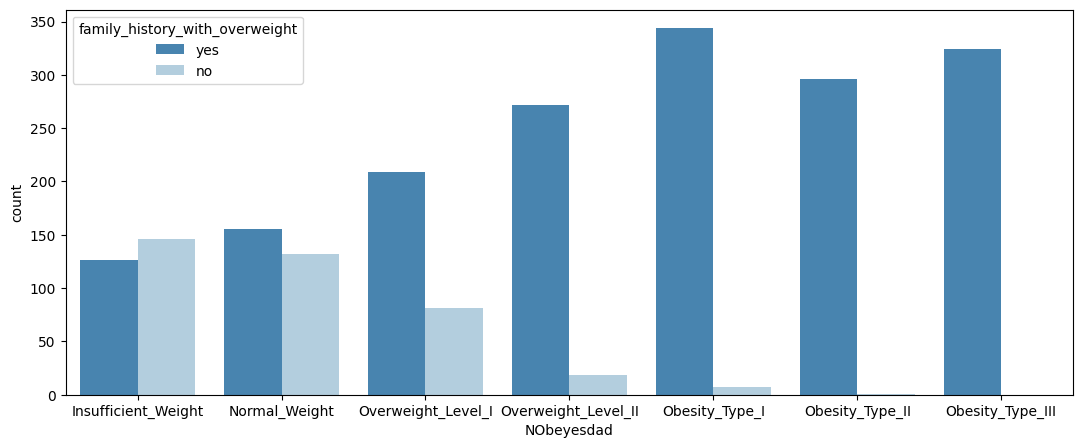

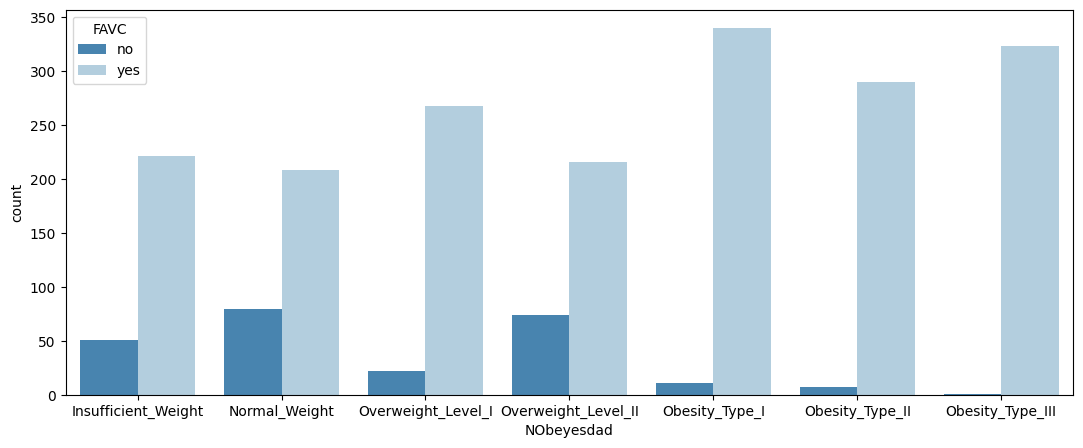

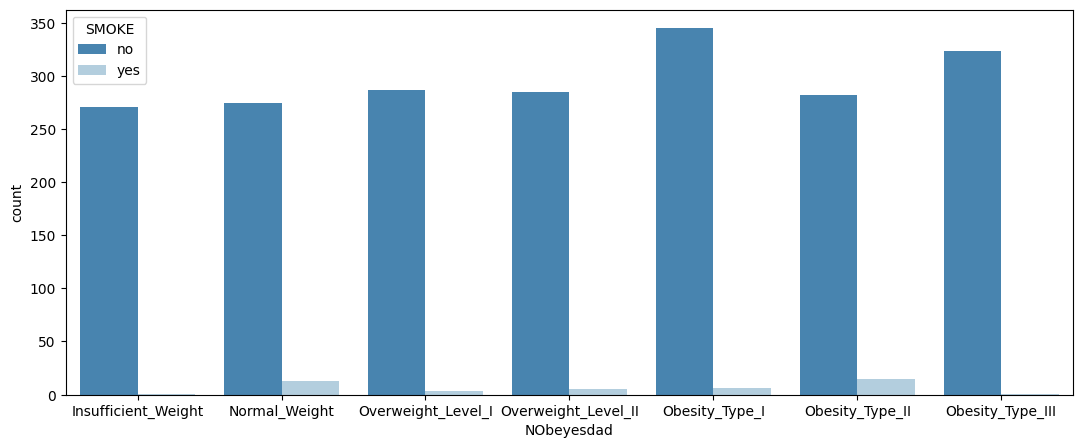

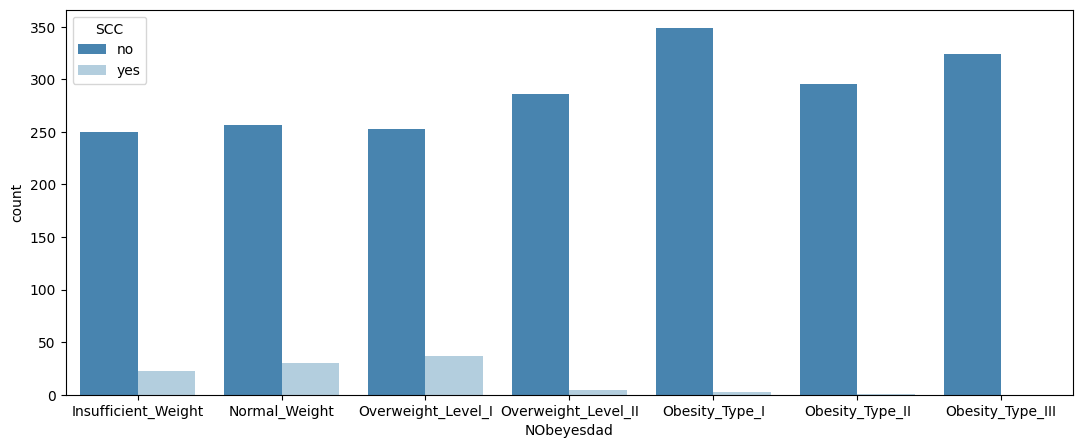

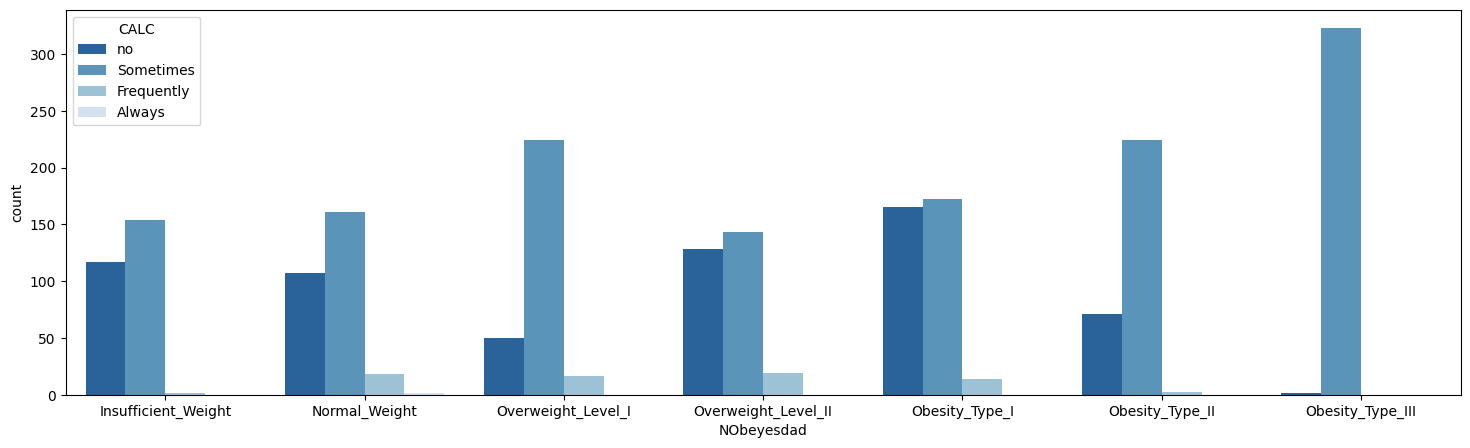

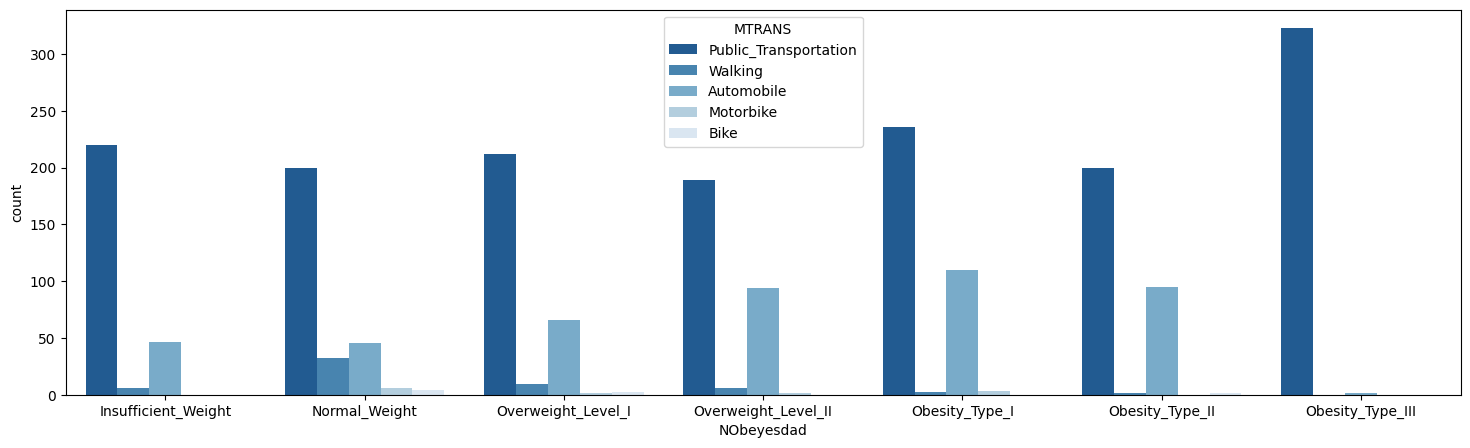

In [10]:
#Overweight and Gender
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "Gender", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])
#Overweight and family history
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "family_history_with_overweight", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])
#Overweight and high calories food
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "FAVC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 
#Overweight and smoking
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "SMOKE", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 
#Overweight and monitoring calories
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "SCC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 
#Overweight and alcohol
plt.figure(figsize = (18, 5))
cross_plot(obesity_data, "NObeyesdad", "CALC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 
#Overweight and means of transport
plt.figure(figsize = (18, 5))
cross_plot(obesity_data, "NObeyesdad", "MTRANS", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

In [11]:
#continous value visualiziation

In [12]:
def plot_distribution(dataset, feature):
    plt.hist(dataset[feature], bins = "fd")
    
    plt.axvline(dataset[feature].mean(), color = "red", label = "mean")
    plt.axvline(dataset[feature].median(), color = "orange", label = "median")
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribution of values in {feature}")
    plt.show()

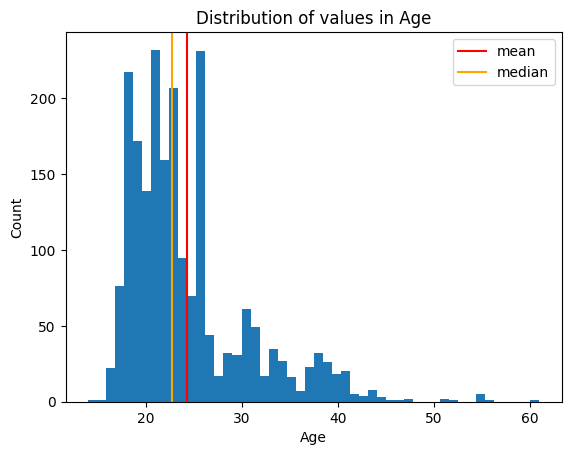

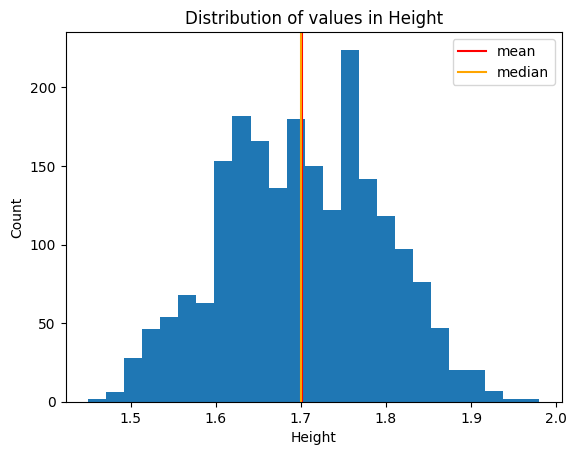

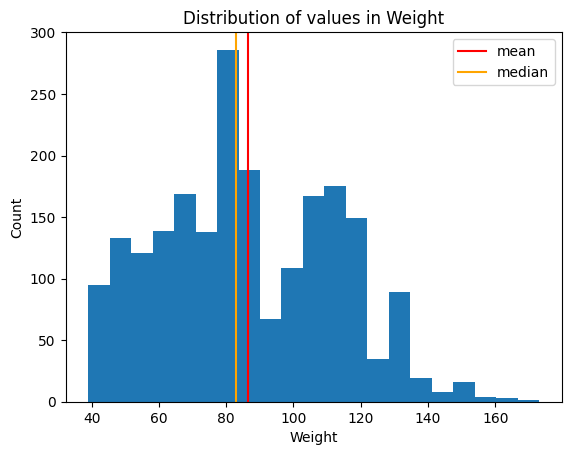

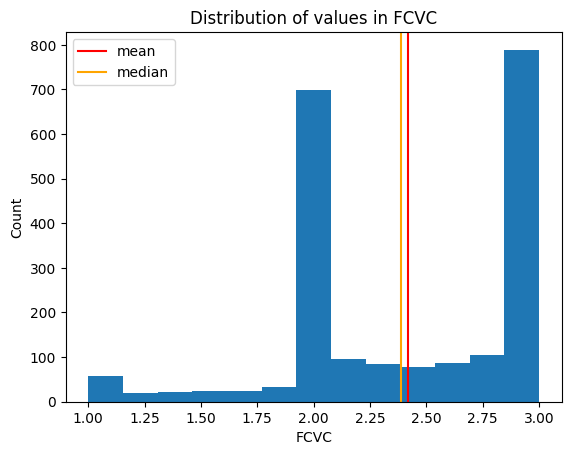

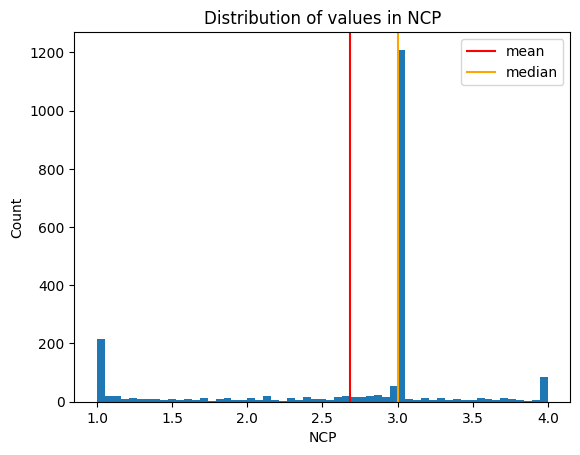

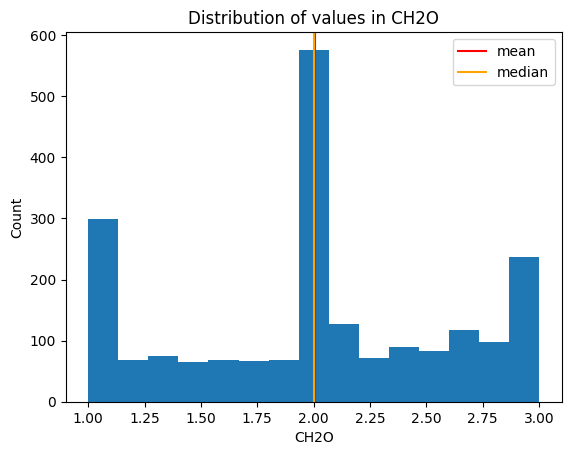

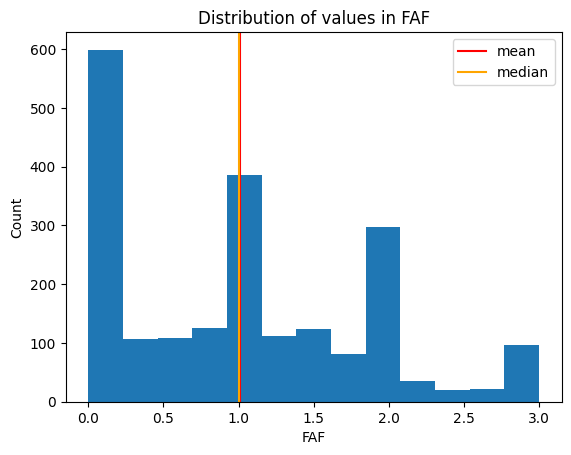

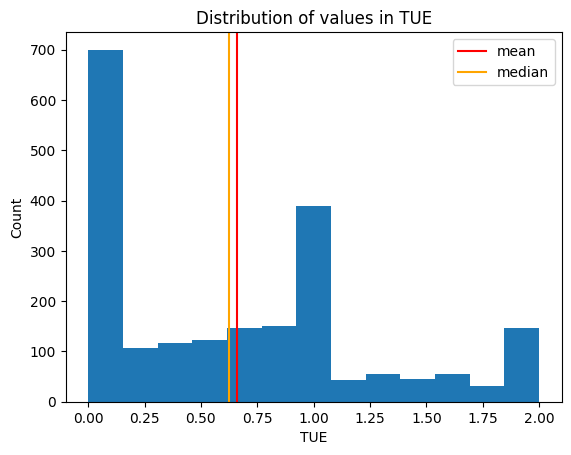

In [13]:
#age 
plot_distribution(obesity_data, "Age")
#Height
plot_distribution(obesity_data, "Height")
#Weight
plot_distribution(obesity_data, "Weight")
#if people consume vegetables
plot_distribution(obesity_data, "FCVC")
#Meals per day
plot_distribution(obesity_data, "NCP")
#Drink water
plot_distribution(obesity_data, "CH2O")
#Physical activity
plot_distribution(obesity_data, "FAF")
#how much time they spend on using technological devices such as cell phone
plot_distribution(obesity_data, "TUE")

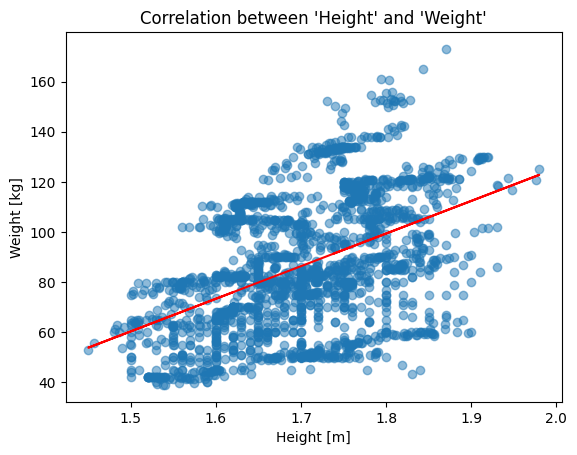

In [14]:
#relationship between height and weight
plt.scatter(obesity_data["Height"], obesity_data["Weight"], alpha = 0.5)
m, b = np.polyfit(obesity_data["Height"], obesity_data["Weight"], 1)
plt.plot(obesity_data["Height"], m * obesity_data["Height"] + b, color = "red")

plt.xlabel("Height [m]")
plt.ylabel("Weight [kg]")
plt.title("Correlation between 'Height' and 'Weight'")
plt.show()

In [15]:
obesity_data.describe().T 

count       mean        std    min        25%        50%         75%  \
Age     2111.0  24.312600   6.345968  14.00  19.947192  22.777890   26.000000   
Height  2111.0   1.701677   0.093305   1.45   1.630000   1.700499    1.768464   
Weight  2111.0  86.586058  26.191172  39.00  65.473343  83.000000  107.430682   
FCVC    2111.0   2.419043   0.533927   1.00   2.000000   2.385502    3.000000   
NCP     2111.0   2.685628   0.778039   1.00   2.658738   3.000000    3.000000   
CH2O    2111.0   2.008011   0.612953   1.00   1.584812   2.000000    2.477420   
FAF     2111.0   1.010298   0.850592   0.00   0.124505   1.000000    1.666678   
TUE     2111.0   0.657866   0.608927   0.00   0.000000   0.625350    1.000000   

           max  
Age      61.00  
Height    1.98  
Weight  173.00  
FCVC      3.00  
NCP       4.00  
CH2O      3.00  
FAF       3.00  
TUE       2.00

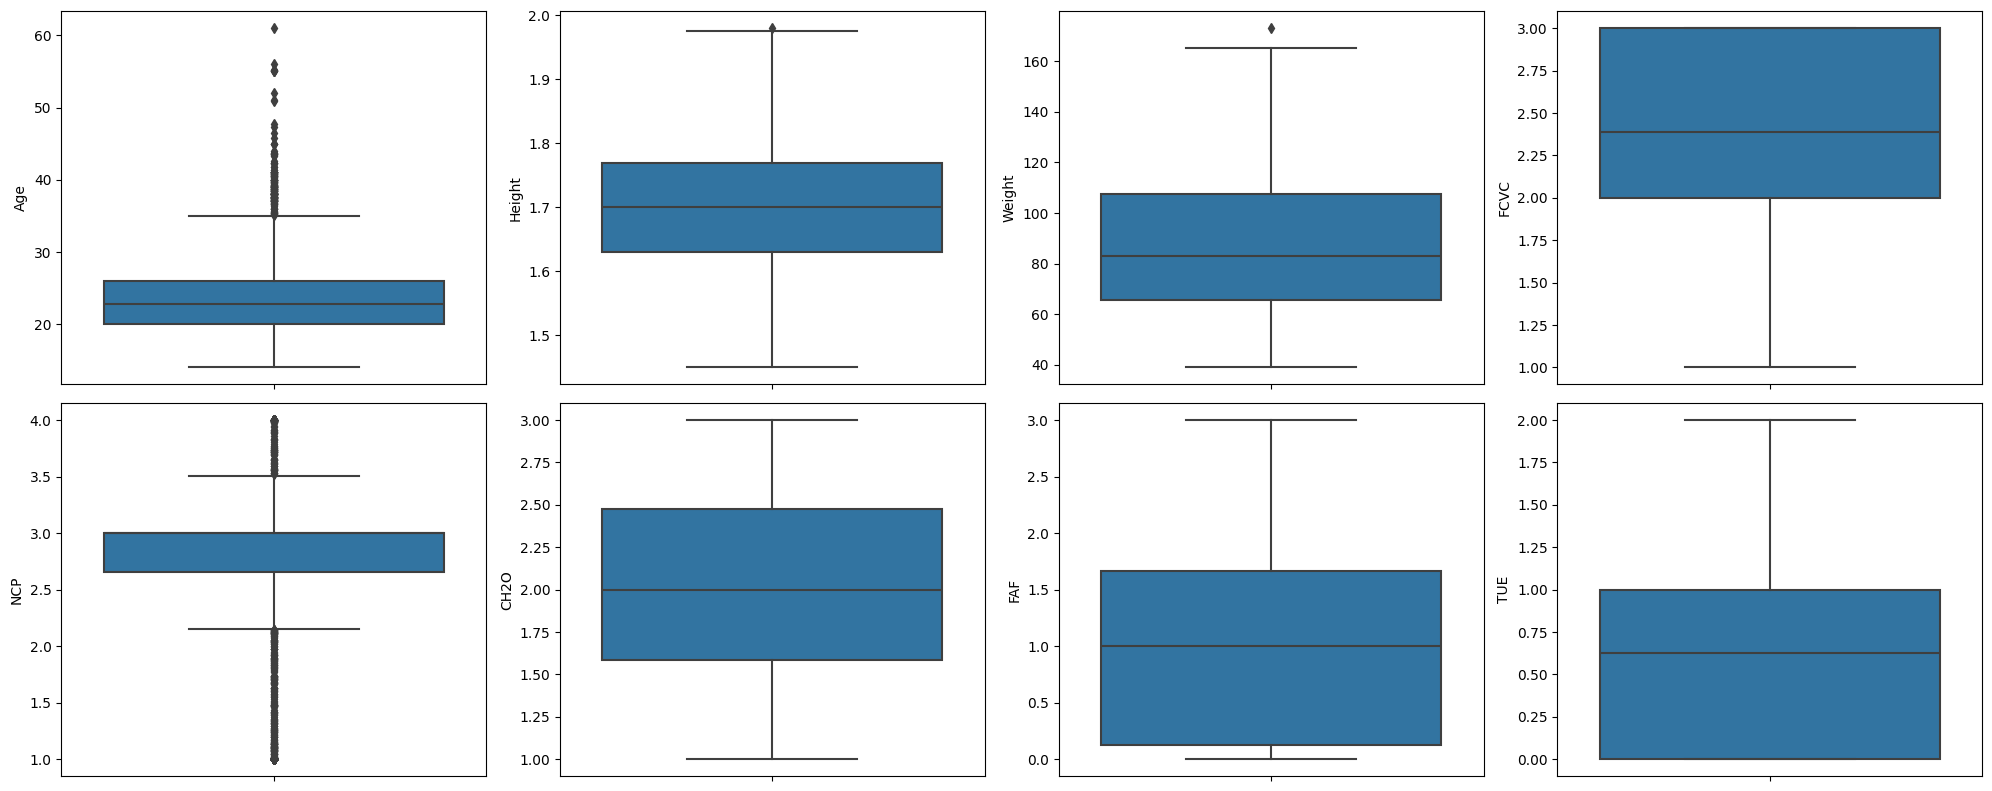

In [16]:
obesity_numeric = obesity_data[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]
fig, axs = plt.subplots(ncols =4, nrows = 2, figsize = (20, 8))

idx = 0
axs = axs.flatten()         
for k, v in obesity_numeric.items():
    sns.boxplot(y = k, data = obesity_numeric, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 1, w_pad = 1, h_pad =1)

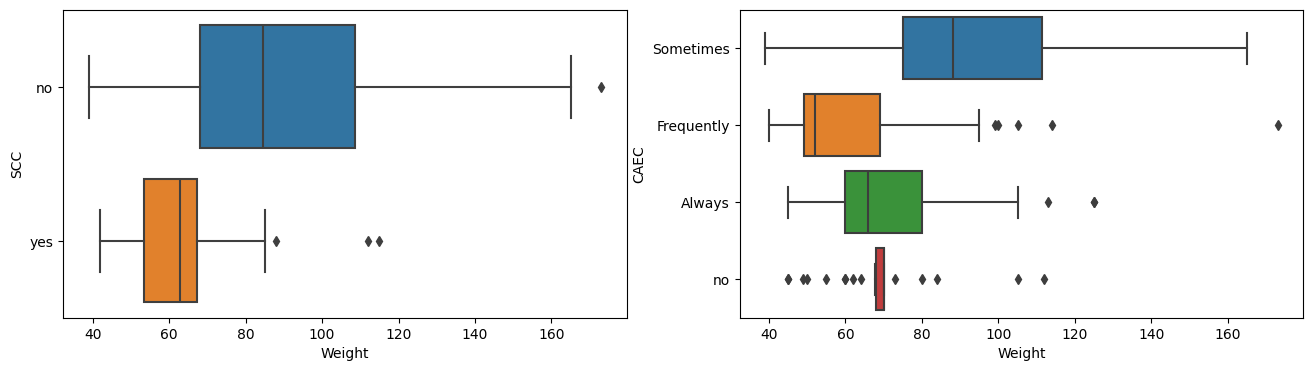

In [17]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.boxplot(x = 'Weight', y = 'SCC', data = obesity_data)
plt.subplot(122)
sns.boxplot(x = 'Weight', y = 'CAEC', data = obesity_data)
plt.show()

In [18]:
#PreProcessing

In [19]:
obesity_data.isna().sum() 

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [20]:
#Encoding Features
obesity_numeric = obesity_data[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]
obesity_dummies = pd.get_dummies(obesity_data[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]])
obesity_lab = obesity_data[["NObeyesdad"]]

In [21]:
obesity_concatenated = pd.concat([obesity_numeric, obesity_dummies, obesity_lab], axis = 1)
obesity_concatenated.head()

Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE  Gender_Female  \
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0              1   
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0              1   
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0              0   
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0              0   
4  22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0              0   

   Gender_Male  ...  CALC_Always  CALC_Frequently  CALC_Sometimes  CALC_no  \
0            0  ...            0                0               0        1   
1            0  ...            0                0               1        0   
2            1  ...            0                1               0        0   
3            1  ...            0                1               0        0   
4            1  ...            0                0               1        0   

   MTRANS_Automobile  MTRANS_Bike  MTRANS_Motorbike  \
0                  0            0                 0   
1                  0            0                 0   
2                  0            0                 0   
3                  0            0                 0   
4                  0            0                 0   

   MTRANS_Public_Transportation  MTRANS_Walking           NObeyesdad  
0                             1               0        Normal_Weight  
1                             1               0        Normal_Weight  
2                             1               0        Normal_Weight  
3                             0               1   Overweight_Level_I  
4                             1               0  Overweight_Level_II  

[5 rows x 32 columns]

In [22]:
#Features and labels
obesity_label = obesity_concatenated["NObeyesdad"]
obesity_features = obesity_concatenated.drop("NObeyesdad", axis = 1)

In [23]:
#to float data

In [24]:
obesity_features.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Female                           uint8
Gender_Male                             uint8
family_history_with_overweight_no       uint8
family_history_with_overweight_yes      uint8
FAVC_no                                 uint8
FAVC_yes                                uint8
CAEC_Always                             uint8
CAEC_Frequently                         uint8
CAEC_Sometimes                          uint8
CAEC_no                                 uint8
SMOKE_no                                uint8
SMOKE_yes                               uint8
SCC_no                                  uint8
SCC_yes                           

In [25]:
obesity_features = obesity_features.astype("float")
obesity_features.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Female                         float64
Gender_Male                           float64
family_history_with_overweight_no     float64
family_history_with_overweight_yes    float64
FAVC_no                               float64
FAVC_yes                              float64
CAEC_Always                           float64
CAEC_Frequently                       float64
CAEC_Sometimes                        float64
CAEC_no                               float64
SMOKE_no                              float64
SMOKE_yes                             float64
SCC_no                                float64
SCC_yes                           

In [26]:
#Scale Features
obesity_features_scaled = MinMaxScaler().fit_transform(obesity_features)

In [27]:
#Encode Labels
encoder = LabelEncoder()
encoder.fit(obesity_label)
obesity_labels_encoded = encoder.transform(obesity_label)

In [28]:
#Train - Test split
obesity_features_tr, obesity_features_ts, obesity_labels_tr, obesity_labels_ts = train_test_split(obesity_features, obesity_labels_encoded,test_size = 0.2, stratify = obesity_labels_encoded,  random_state = 42)


In [29]:
#building model using 


In [30]:
#Decision trees

In [121]:
#Train - Test split

model_tree = DecisionTreeClassifier(criterion='entropy',max_depth = 13, random_state = 42)



In [32]:
def train_predict_score(estimator, train_features, train_labels, test_features, test_labels):
    estimator.fit(train_features, train_labels)
    print(f"Accuracy on Train data: {accuracy_score(train_labels, estimator.predict(train_features))}")
    print(f"F1 score on Train data: {f1_score(train_labels, estimator.predict(train_features), average = 'weighted')}")
    print(f"Accuracy on Test data: {accuracy_score(test_labels, estimator.predict(test_features))}")
    print(f"F1 on Test data: {f1_score(test_labels, estimator.predict(test_features), average = 'weighted')}")

In [33]:
train_predict_score(model_tree, obesity_features_tr, obesity_labels_tr, obesity_features_ts, obesity_labels_ts)

Accuracy on Train data: 1.0
F1 score on Train data: 1.0
Accuracy on Test data: 0.9432624113475178
F1 on Test data: 0.9436165995955953


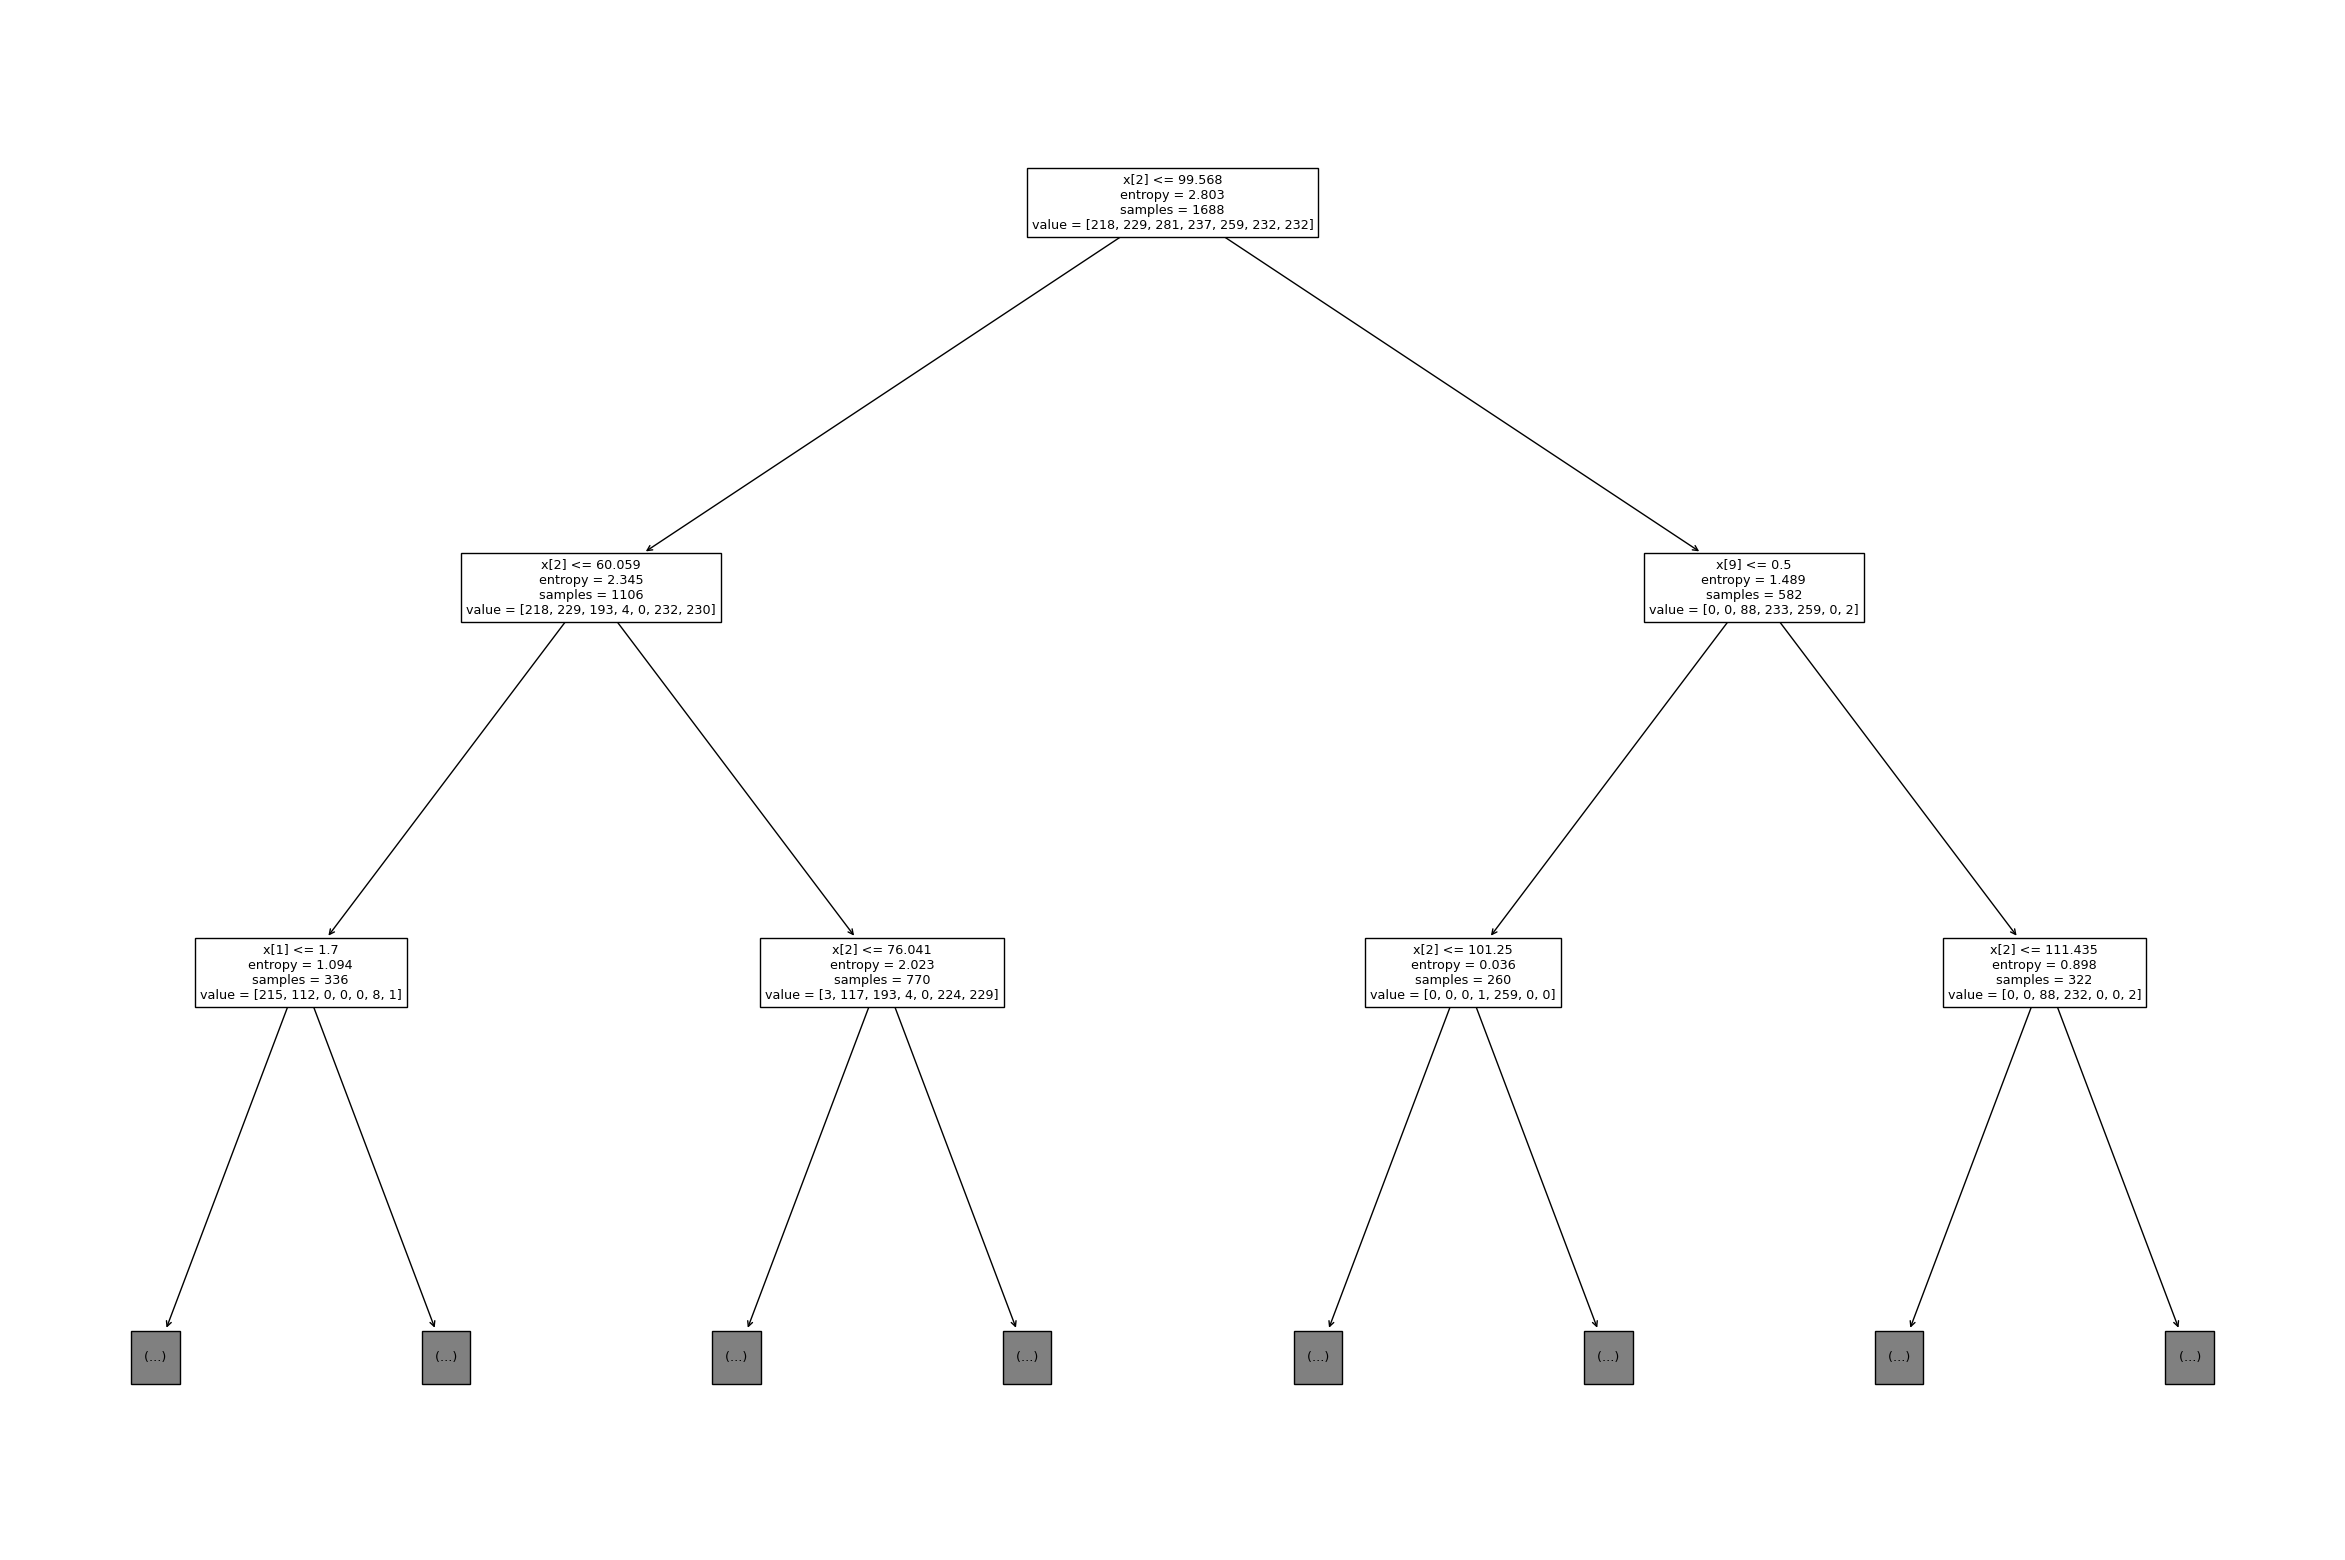

In [34]:
plt.figure(figsize = (30, 20))
plot_tree(model_tree, max_depth = 2)
plt.show()

In [35]:
#classification_report
print(classification_report(obesity_labels_ts, model_tree.predict(obesity_features_ts)))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.90      0.91      0.91        58
           2       0.88      0.99      0.93        70
           3       0.98      0.92      0.95        60
           4       1.00      0.98      0.99        65
           5       0.90      0.93      0.92        58
           6       0.98      0.91      0.95        58

    accuracy                           0.94       423
   macro avg       0.95      0.94      0.94       423
weighted avg       0.95      0.94      0.94       423



In [36]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
clf=model_tree.fit(obesity_features_tr, obesity_labels_tr)
predictions =clf.predict(obesity_features_ts)
confusion_matrix(obesity_labels_ts, predictions)

array([[51,  3,  0,  0,  0,  0,  0],
       [ 1, 53,  0,  0,  0,  4,  0],
       [ 0,  0, 69,  1,  0,  0,  0],
       [ 0,  0,  5, 55,  0,  0,  0],
       [ 0,  0,  1,  0, 64,  0,  0],
       [ 0,  3,  0,  0,  0, 54,  1],
       [ 0,  0,  3,  0,  0,  2, 53]], dtype=int64)

In [37]:
#clustring and k-mean 

X=obesity_data.loc[:, ["Height", "Weight"]]



C:\Users\nesma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nesma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\nesma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nesma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\Users\nesma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nesma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\nesma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nesma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Text(0, 0.5, 'Distortion')

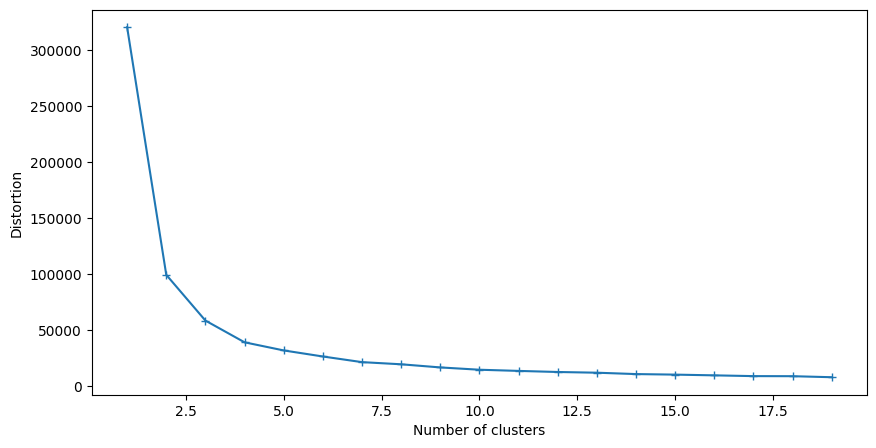

In [48]:
from sklearn.cluster import KMeans
dist_list=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i,init='random',random_state=101)
    kmeans.fit(obesity_features_ts)
    dist_list.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(range(1,20),dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')


C:\Users\nesma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nesma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Axes: xlabel='Height', ylabel='Weight'>

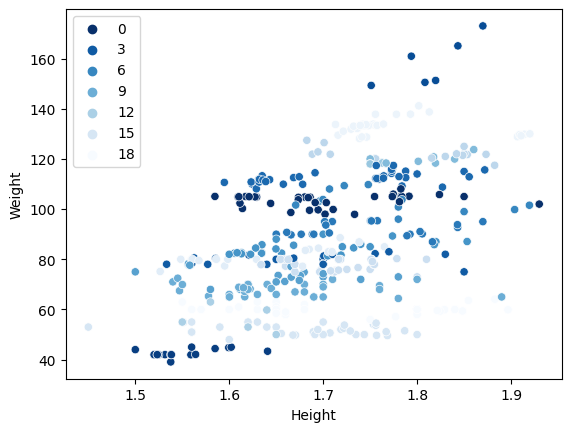

In [79]:
kmeans2=KMeans(n_clusters=2,random_state=101)
kmeans2.fit(obesity_features_ts)

labels=kmeans2.labels_

correct_labels=sum(obesity_labels_ts==labels)
print('n_clusters=3: %d out of %d samples were correctly labeled.' % (correct_labels,obesity_labels_ts.size))
print('Accuracy score: {0:0.2f}'.format(correct_labels/float(obesity_labels_ts.size)))

n_clusters=3: 58 out of 423 samples were correctly labeled.
Accuracy score: 0.14


C:\Users\nesma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nesma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [56]:
kmeans3=KMeans(n_clusters=3,random_state=101)
kmeans3.fit(obesity_features_ts)

labels=kmeans3.labels_

correct_labels=sum(obesity_labels_ts==labels)
print('n_clusters=3: %d out of %d samples were correctly labeled.' % (correct_labels,obesity_labels_ts.size))
print('Accuracy score: {0:0.2f}'.format(correct_labels/float(obesity_labels_ts.size)))

n_clusters=3: 67 out of 423 samples were correctly labeled.
Accuracy score: 0.16


C:\Users\nesma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nesma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [78]:
kmeans4=KMeans(n_clusters=4,random_state=101)

kmeans4.fit(obesity_features_ts)

labels=kmeans4.labels_

correct_labels=sum(obesity_labels_ts==labels)
print('n_clusters=3: %d out of %d samples were correctly labeled.' % (correct_labels,obesity_labels_ts.size))
print('Accuracy score: {0:0.2f}'.format(correct_labels/float(obesity_labels_ts.size)))

n_clusters=3: 45 out of 423 samples were correctly labeled.
Accuracy score: 0.11


C:\Users\nesma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nesma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [86]:
labels=pd.Series(kmeans3.labels_,name='cluster_number')
df_with_cluster=pd.concat([obesity_features_ts,labels],axis=1)
df_with_cluster.head(50).dropna()


Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE  Gender_Female  \
370  19.0    1.80    60.0   2.0  3.0   1.0  1.0  1.0            0.0   
172  23.0    1.65    59.0   3.0  1.0   2.0  1.0  2.0            1.0   
69   23.0    1.80    60.0   2.0  3.0   3.0  0.0  1.0            0.0   
53   23.0    1.63    55.0   3.0  3.0   2.0  2.0  1.0            1.0   
386  18.0    1.59    53.0   1.0  3.0   1.0  1.0  2.0            1.0   
77   24.0    1.70    80.0   2.0  3.0   3.0  0.0  0.0            1.0   
344  18.0    1.87   173.0   3.0  3.0   2.0  2.0  1.0            0.0   
314  26.0    1.65    63.0   3.0  3.0   1.0  1.0  0.0            1.0   
28   19.0    1.75    76.0   3.0  3.0   2.0  3.0  1.0            0.0   

     Gender_Male  ...  CALC_Always  CALC_Frequently  CALC_Sometimes  CALC_no  \
370          1.0  ...          0.0              0.0             0.0      1.0   
172          0.0  ...          0.0              0.0             1.0      0.0   
69           1.0  ...          0.0              0.0             1.0      0.0   
53           0.0  ...          0.0              0.0             0.0      1.0   
386          0.0  ...          0.0              0.0             0.0      1.0   
77           0.0  ...          0.0              0.0             0.0      1.0   
344          1.0  ...          0.0              0.0             1.0      0.0   
314          0.0  ...          0.0              0.0             0.0      1.0   
28           1.0  ...          0.0              0.0             1.0      0.0   

     MTRANS_Automobile  MTRANS_Bike  MTRANS_Motorbike  \
370                0.0          0.0               0.0   
172                0.0          0.0               0.0   
69                 0.0          0.0               0.0   
53                 0.0          0.0               0.0   
386                0.0          0.0               0.0   
77                 0.0          0.0               0.0   
344                0.0          0.0               0.0   
314                0.0          0.0               0.0   
28                 0.0          0.0               0.0   

     MTRANS_Public_Transportation  MTRANS_Walking  cluster_number  
370                           1.0             0.0             1.0  
172                           1.0             0.0             1.0  
69                            1.0             0.0             0.0  
53                            1.0             0.0             0.0  
386                           1.0             0.0             1.0  
77                            1.0             0.0             1.0  
344                           1.0             0.0             1.0  
314                           0.0             1.0             1.0  
28                            1.0             0.0             1.0  

[9 rows x 32 columns]

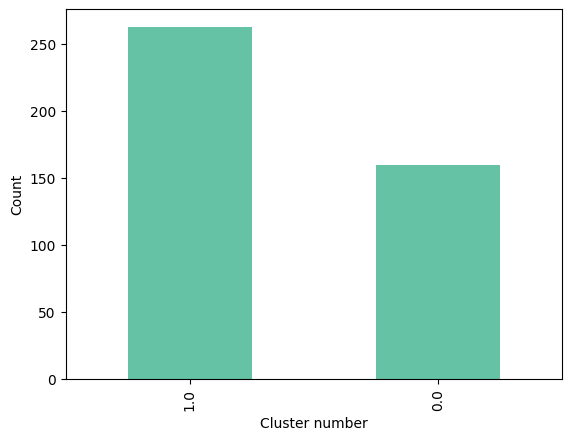

In [87]:
df_with_cluster['cluster_number'].value_counts().plot(kind='bar',cmap='Set2')
plt.xlabel('Cluster number')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Height', ylabel='Weight'>

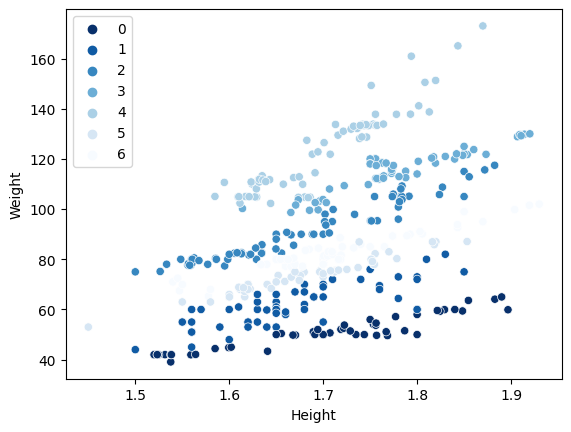

In [94]:
#scatter the test labels
sns.scatterplot(data = obesity_features_ts, x = "Height", y = "Weight",hue = obesity_labels_ts,  palette = "Blues_r")

C:\Users\nesma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nesma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Axes: xlabel='Height', ylabel='Weight'>

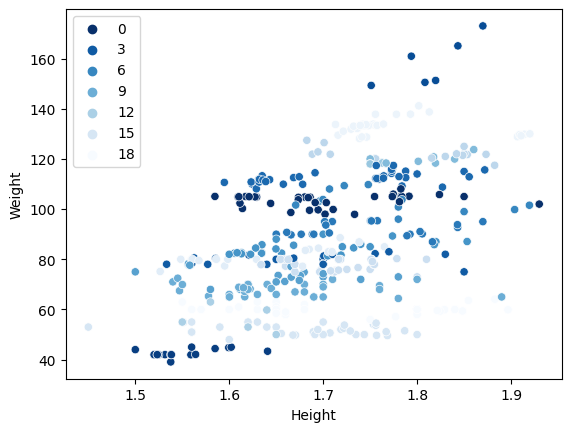

In [95]:
#scatter the predicted label after k-means clustring
predicted_labels = kmeans.fit_predict(obesity_features_ts)




sns.scatterplot(data = obesity_features_ts, x = "Height", y = "Weight",hue = predicted_labels,  palette = "Blues_r")

In [106]:
#KNeighborsClassifier

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(obesity_features, obesity_labels_encoded,test_size = 0.2, stratify = obesity_labels_encoded,  random_state = 42)

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [100]:
y_pred_KN = knn.predict(x_test)

In [102]:
from sklearn.metrics import accuracy_score
accuracy_KN = accuracy_score(y_test, y_pred_KN)
print("ACCURACY: ", accuracy_KN)

ACCURACY:  0.8841607565011821


In [103]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_KN)
print('REPORT: ', report)

REPORT:                precision    recall  f1-score   support

           0       0.87      0.98      0.92        54
           1       0.89      0.59      0.71        58
           2       0.95      0.90      0.93        70
           3       0.92      0.97      0.94        60
           4       0.98      0.98      0.98        65
           5       0.76      0.90      0.83        58
           6       0.81      0.86      0.83        58

    accuracy                           0.88       423
   macro avg       0.88      0.88      0.88       423
weighted avg       0.89      0.88      0.88       423



In [105]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_KN)
cm

array([[53,  1,  0,  0,  0,  0,  0],
       [ 7, 34,  0,  0,  0, 13,  4],
       [ 0,  0, 63,  2,  0,  0,  5],
       [ 0,  0,  1, 58,  1,  0,  0],
       [ 0,  0,  0,  1, 64,  0,  0],
       [ 1,  2,  0,  0,  0, 52,  3],
       [ 0,  1,  2,  2,  0,  3, 50]], dtype=int64)

In [107]:
#RandomForestClassifier

In [108]:
from sklearn.ensemble import RandomForestClassifier
RF_model  = RandomForestClassifier()
RF_model.fit(x_train, y_train)
y_pred_RF = RF_model.predict(x_test)

In [109]:
accuracy_RF = accuracy_score(y_pred_RF, y_test)
print("ACCURACY RF: ", accuracy_RF)

ACCURACY RF:  0.9408983451536643


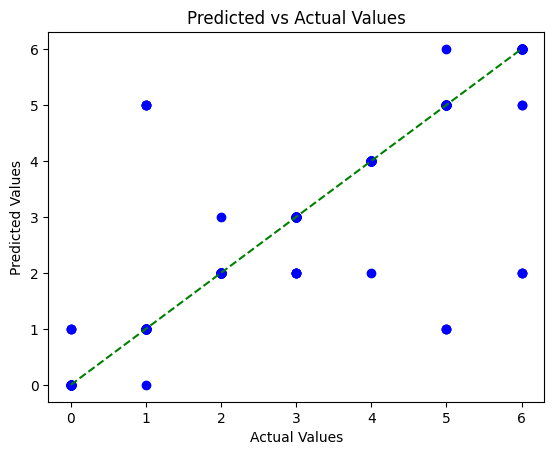

In [111]:
#DECISION TREE CLASSIFIER PLOT
plt.scatter(obesity_labels_ts, predictions, color = 'blue', alpha = 1.0)
plt.plot([obesity_labels_ts.min(), obesity_labels_ts.max()], [obesity_labels_ts.min(), obesity_labels_ts.max()], color = 'green', linestyle = '--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()



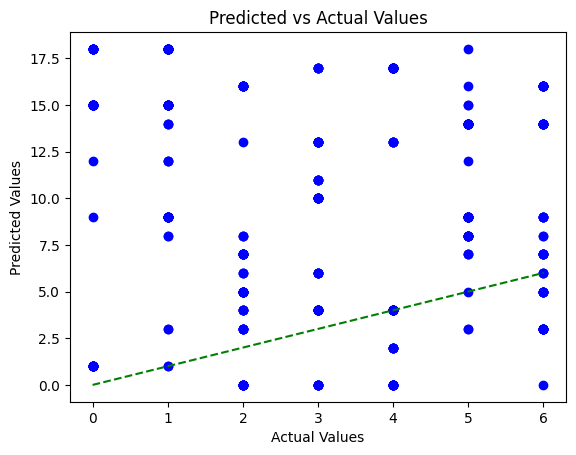

In [115]:
#k-mean plot
plt.scatter(obesity_labels_ts, predicted_labels, color = 'blue', alpha = 1.0)
plt.plot([obesity_labels_ts.min(), obesity_labels_ts.max()], [obesity_labels_ts.min(), obesity_labels_ts.max()], color = 'green', linestyle = '--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

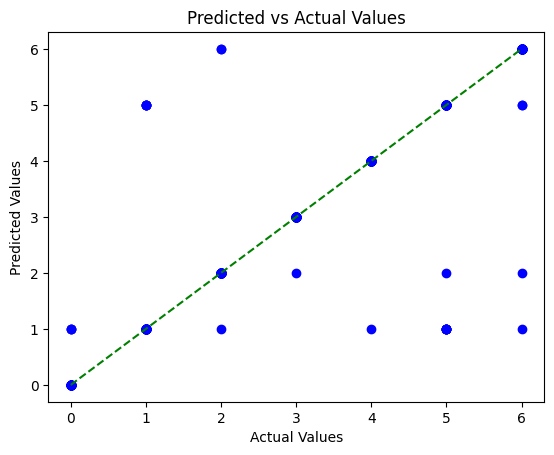

In [112]:
#Random Forest plot
plt.scatter(y_test, y_pred_RF, color = 'blue', alpha = 1.0)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'green', linestyle = '--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

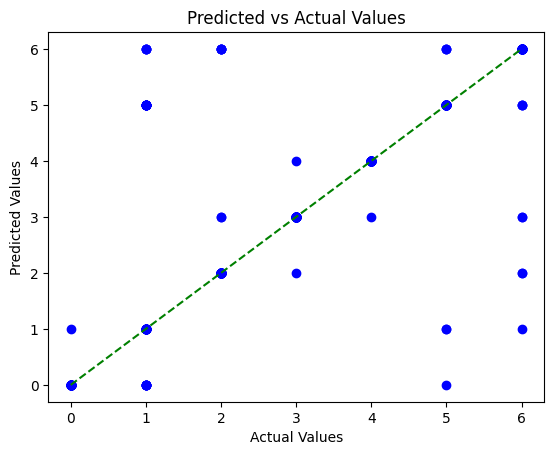

In [113]:
#knn plot
plt.scatter(y_test, y_pred_KN, color = 'blue', alpha = 1.0)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'green', linestyle = '--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

In [124]:
#ensmble learning using bagging and decision tree

In [123]:
#Train - Test split
obesity_features_tr, obesity_features_ts, obesity_labels_tr, obesity_labels_ts = train_test_split(obesity_features, obesity_labels_encoded,test_size = 0.2, stratify = obesity_labels_encoded,  random_state = 42)
model_tree = DecisionTreeClassifier(criterion='entropy',max_depth = 13, random_state = 42)
model_tree.fit(obesity_features_tr, obesity_labels_tr)
print(f"Accuracy on Test data: {accuracy_score(obesity_labels_ts, model_tree.predict(obesity_features_ts))}")

Accuracy on Test data: 0.9432624113475178


In [125]:
from sklearn.ensemble import BaggingClassifier

bag_model= BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
bag_model.fit(obesity_features_tr,obesity_labels_tr)
bag_model.oob_score_

C:\Users\nesma\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9585308056872038